In [1]:
from train_unet import *

In [2]:
val(0)

Validation epoch 0: avg_dice_loss = 1.0169038146289426, avg_iou = 0.03378310671715594, avg_acc = 0.06487489240383035


(1.0169038146289426, 0.03378310671715594)

In [2]:
train_loss, val_loss = train()

starting training
epoch0, iter0, loss: 0.998489499092102
epoch0, iter120, loss: 0.7965257167816162
epoch0, iter240, loss: 0.8137232661247253
epoch0, iter360, loss: 0.7740631699562073
epoch0, iter480, loss: 0.7674551010131836
epoch0, iter600, loss: 0.7409142255783081
Finish epoch 0, time elapsed 63.348923206329346
Validation epoch 0: avg_dice_loss = 0.7728844092853033, avg_iou = 0.4674505228426919, avg_acc = 0.6257275649860724
best val loss achieved, saving model
Final test from best model : avg_iou = 0.4674505228426919, avg_acc = 0.6257275615165483
 Class wise ious getting saved in unet_IOU_Classwise.csv file
found all nonzero
--------------------
epoch1, iter0, loss: 0.7643362283706665
epoch1, iter120, loss: 0.7563552856445312
epoch1, iter240, loss: 0.7153456807136536
epoch1, iter360, loss: 0.7612726092338562
epoch1, iter480, loss: 0.750953197479248
epoch1, iter600, loss: 0.7060956954956055
Finish epoch 1, time elapsed 65.28730130195618
Validation epoch 1: avg_dice_loss = 0.7722787946

In [15]:
def plot_loss_curves(train_loss,val_loss):
    title = "Loss 5c - Unet"
    fig_name = "Loss_unet_dice.jpg"
    x = [i for i in range(len(train_loss))]
    plt.plot(x, train_loss,label="Train Loss")
    plt.plot(x, val_loss,label="Validation Loss")
    plt.legend()
    plt.xlabel("# of epoch")
    plt.ylabel("Dice Loss")
    plt.grid(True)
    plt.title(title)
    plt.savefig(fig_name, dpi=300)
    plt.show()

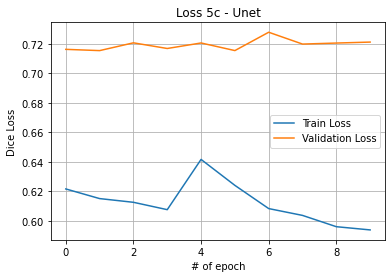

In [16]:
plot_loss_curves(train_loss,val_loss)

Final test from best model : avg_iou = 0.6642496562715786, avg_acc = 0.7889689420586201
 Class wise ious getting saved in unet_IOU_Classwise.csv file


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


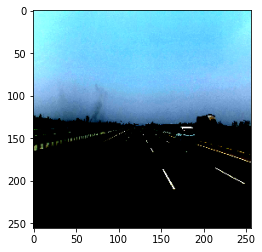

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


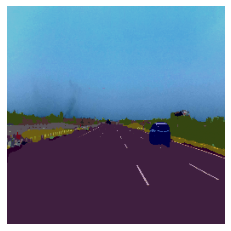

In [17]:
test()

In [18]:
img_name = pd.read_csv('test.csv', header=None).iloc[0, 0]
img = Image.open(img_name).convert('RGB')
img = np.asarray(img, dtype="float32") / 255.
img = np.pad(img, ((4,4),(0,0), (0,0)), 'constant')
img = torch.from_numpy(img)
img = img.permute(2, 0, 1)
img = transforms.Normalize((0.485, 0.456, 0.406), (0.229, 0.224, 0.225))(img)
img = torch.unsqueeze(img, 0)
img = img.cuda()
print(img.shape)

torch.Size([1, 3, 1088, 1920])


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


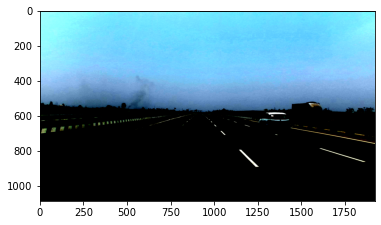

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


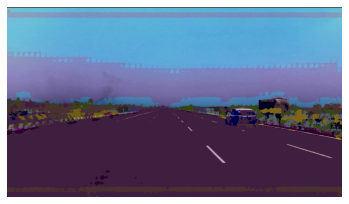

In [19]:
unet_model = torch.load('unet')
unet_model.eval()
outputs = unet_model(img)
predictions = torch.nn.functional.softmax(outputs,1)
predictions = torch.argmax(predictions,dim=1)
predictions = predictions.cpu().numpy()
inputImage = img.permute(0, 2, 3, 1).cpu().numpy().squeeze()
plt.imshow(inputImage, cmap='gray')
plt.show()
rows, cols = predictions.shape[1], predictions.shape[2]
#print(labels)
new_predictions = np.zeros((predictions.shape[1], predictions.shape[2], 3))
for row in range(rows):
    for col in range(cols):
        idx = int(predictions[0][row][col])
        new_predictions[row][col][:] = np.asarray(labels[idx].color)/255       

plt.imshow(inputImage)
plt.imshow(new_predictions, alpha=0.5)
plt.axis('off')
fig_name = "Overlayed_unet.jpg"  
plt.savefig(fig_name, dpi=300)
plt.show()